In [ ]:
#@title
#Tanveer_1728042
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
import random as rn
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, concatenate, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from tensorflow.keras.utils import to_categorical
import os
import pathlib
import cv2
from tqdm import tqdm
import os
from zipfile import ZipFile
from PIL import Image
from os import listdir
from os.path import join
import pandas
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn import preprocessing


np.random.seed(42)

In [ ]:
# hyper-parameters
batch_size = 32

# categories of images
num_classes = 2

# number of training epochs
epochs = 100

IMG_SIZE = 100

In [ ]:
def load_data2():
    """This function loads dataset, normalized, and labels one-hot encoded"""
    train_data_dir = pathlib.Path('/content/drive/MyDrive/Final(8th)/Paddy Classification/Train')
    test_data_dir = pathlib.Path('/content/drive/MyDrive/Final(8th)/Paddy Classification/Test')    
    train_folders = os.listdir(train_data_dir)
    test_folders = os.listdir(test_data_dir)

    train_image_names = []
    test_image_names = []
    train_labels = []
    train_images = []
    test_labels = []
    test_images = []

    size = 100, 100

    for folder in train_folders:
        for file in os.listdir(os.path.join(train_data_dir,folder)):
            if file.endswith("jpg") or file.endswith("jpeg") or file.endswith("png") or file.endswith("JPG"):
                train_image_names.append(file)
                train_labels.append(folder)
                img = cv2.imread(os.path.join(train_data_dir,folder,file))
                im = cv2.resize(img,size)
                train_images.append(im)
            else:
                continue

    for folder in test_folders:
        for file in os.listdir(os.path.join(test_data_dir,folder)):
            if file.endswith("jpg") or file.endswith("jpeg") or file.endswith("png") or file.endswith("JPG"):
                test_image_names.append(file)
                test_labels.append(folder)
                img = cv2.imread(os.path.join(test_data_dir,folder,file))
                im = cv2.resize(img,size)
                test_images.append(im)
            else:
                continue

    X_train = np.array(train_images)
    X_test = np.array(test_images)
 
    print("Training samples:", X_train.shape[0])
    print("Testing samples:", X_test.shape[0])
    
    X_train = X_train.astype("float32")
    X_test = X_test.astype("float32")
    X_train /= 255
    X_test /= 255

    train_label_dummies = pandas.get_dummies(train_labels)
    test_label_dummies = pandas.get_dummies(test_labels)

    trainlabels = train_label_dummies.values.argmax(1)
    testlabels = test_label_dummies.values.argmax(1)

    X_train = np.array(X_train)
    y_train = np.array(trainlabels)


    X_test = np.array(X_test)
    y_test = np.array(testlabels)

    print('OK')
    return(X_train, y_train),(X_test, y_test), (train_image_names, test_image_names)


In [ ]:
def create_model():
  model = Sequential()
  model.add(Conv2D(224, (3, 3), activation='relu', input_shape=(100, 100, 3)))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25)) 

  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25)) 

  model.add(Conv2D(32, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25)) 

  model.add(Conv2D(128, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(16, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))  
    
  model.add(Flatten())
  model.add(Dense(500, activation='softmax'))
  model.add(Dropout(0.25)) 
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  return model

In [ ]:
if __name__ == "__main__":

    # load the data
    (X_train, y_train), (X_test, y_test), (train_image_names, test_image_names) = load_data2()
	
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size=0.1, random_state=1)
    #print("Validation samples:", X_val.shape[0])
    
    # construct the model
    model = create_model()
    
    # train
    model.fit(X_train, y_train,
            batch_size=batch_size,
            epochs=epochs,
            steps_per_epoch=10,
            validation_steps=100,
            validation_data=(X_val, y_val))
    validation_steps = 20
    
    # evaluate
    loss0, accuracy0 = model.evaluate(X_val, y_val, steps = 20)

    print("Validation Loss: {:.2f}".format(loss0))
    print("Validation Accuracy: {:.2f}".format(accuracy0))

# test item prediction
testLabelPredicted = model.predict(X_test)
testLabelPredicted =  np.rint(testLabelPredicted.argmax(axis=-1))
#print(test_image_names)
testLabelGold = y_test
#print(testLabelGold)

# Evaluation
results = confusion_matrix(testLabelGold, testLabelPredicted) 

Training samples: 702
Testing samples: 298
OK
Epoch 1/100
10/10 [==============================] - 8s 89ms/step - loss: 0.6933 - accuracy: 0.4711 - val_loss: 0.6931 - val_accuracy: 0.5070
Epoch 2/100
10/10 [==============================] - 1s 61ms/step - loss: 0.6935 - accuracy: 0.4706
Epoch 3/100
10/10 [==============================] - 0s 36ms/step - loss: 0.6932 - accuracy: 0.4986
Epoch 4/100
10/10 [==============================] - 0s 36ms/step - loss: 0.6925 - accuracy: 0.5469
Epoch 5/100
10/10 [==============================] - 0s 36ms/step - loss: 0.6806 - accuracy: 0.7166
Epoch 6/100
10/10 [==============================] - 0s 47ms/step - loss: 0.6566 - accuracy: 0.8144
Epoch 7/100
10/10 [==============================] - 0s 37ms/step - loss: 0.6554 - accuracy: 0.6967
Epoch 8/100
10/10 [==============================] - 0s 36ms/step - loss: 0.6420 - accuracy: 0.7176
Epoch 9/100
10/10 [==============================] - 0s 36ms/step - loss: 0.6031 - accuracy: 0.8341
Epoch 10/100

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# test item prediction
testLabelPredicted = model.predict(X_test)
testLabelPredicted =  np.rint(testLabelPredicted.argmax(axis=-1))
#print(test_image_names)
testLabelGold = y_test
#print(testLabelGold)

# Evaluation
results = confusion_matrix(testLabelGold, testLabelPredicted) 
    
print ('Confusion Matrix :')
print (results) 

print ('Recall Score :',recall_score(testLabelGold, testLabelPredicted, average='micro'))
print ('Precision Score :',precision_score(testLabelGold, testLabelPredicted, average='micro'))
print ('F1 Score :',f1_score(testLabelGold, testLabelPredicted, average='micro'))
print ('Accuracy :',accuracy_score(testLabelGold, testLabelPredicted))

Confusion Matrix :
[[143   5]
 [ 17 133]]
Recall Score : 0.9261744966442953
Precision Score : 0.9261744966442953
F1 Score : 0.9261744966442953
Accuracy : 0.9261744966442953


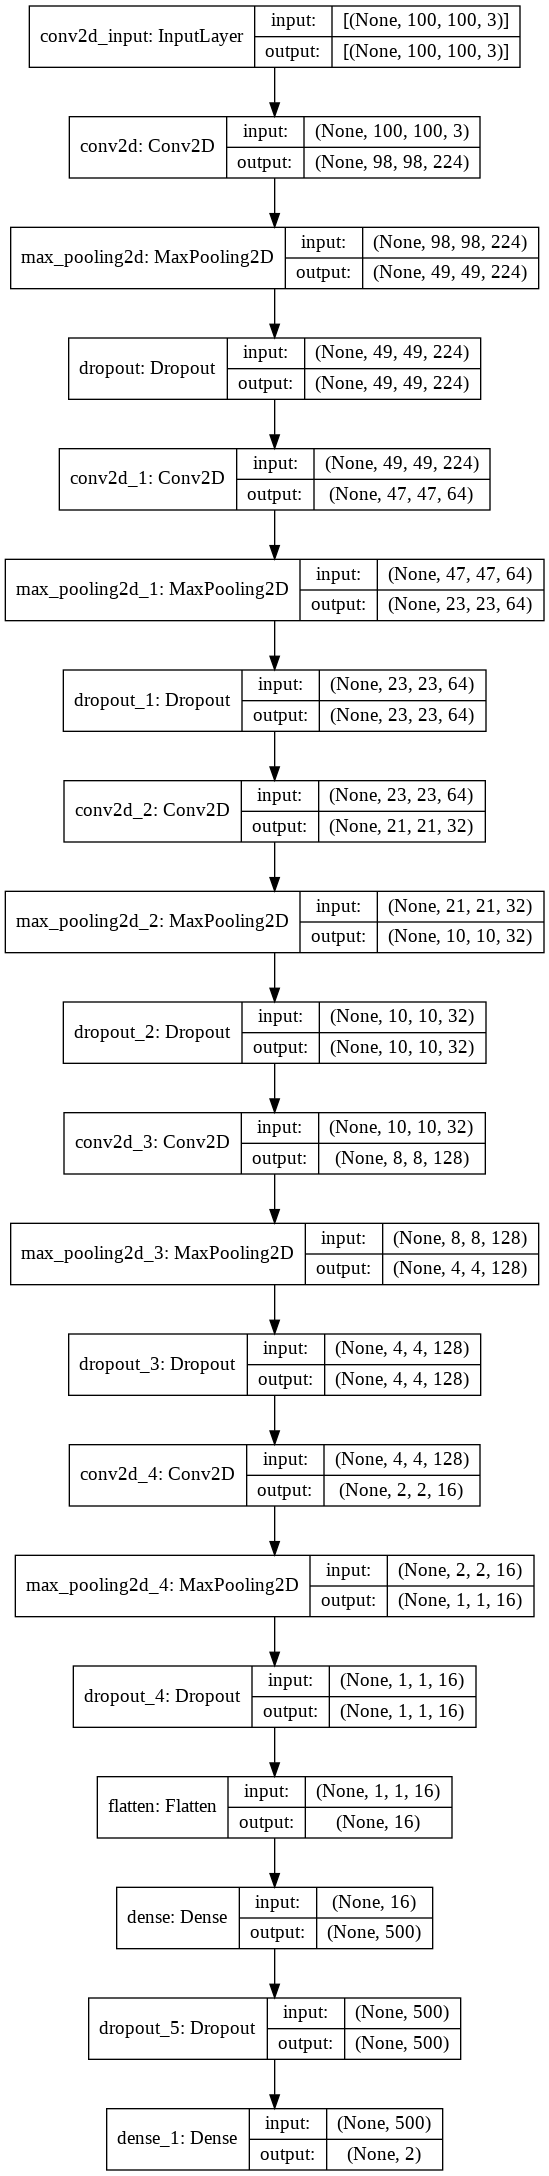

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True,
               to_file=os.path.join('model.png'))

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 224)       6272      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 224)       0         
_________________________________________________________________
dropout (Dropout)            (None, 49, 49, 224)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        129088    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 32)        1

In [ ]:
labels=['Paddy','No Paddy']

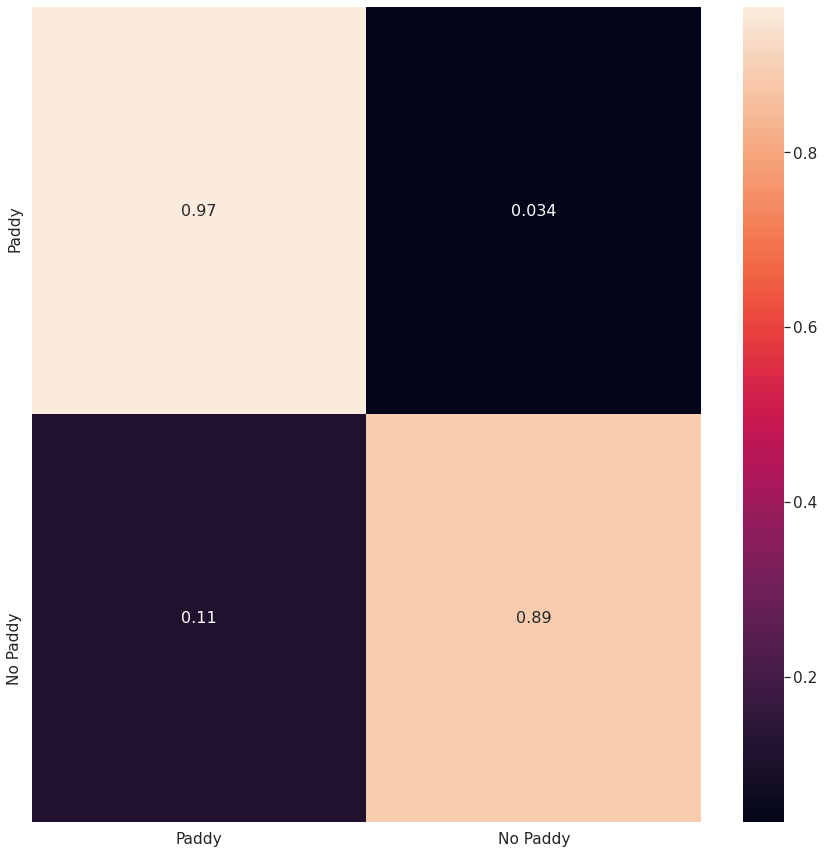

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
cm = confusion_matrix(testLabelGold, testLabelPredicted, normalize='true')
df_cm = pd.DataFrame(cm, range(2), range(2))
plt.figure(figsize=(15,15))
sbn.set(font_scale=1.4) # for label size
sbn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, xticklabels=labels, yticklabels=labels)

plt.show()